In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
img=cv.imread("Image/lena.tiff")
im=cv.imread("Image/lena.tiff",0)

In [3]:
img.shape

(512, 512, 3)

In [4]:
print(img)

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


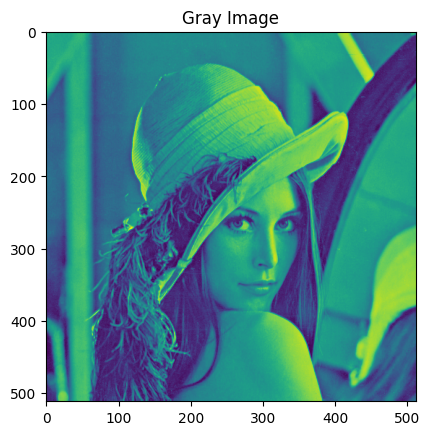

In [5]:
plt.imshow(im)
plt.title("Gray Image")
plt.show()

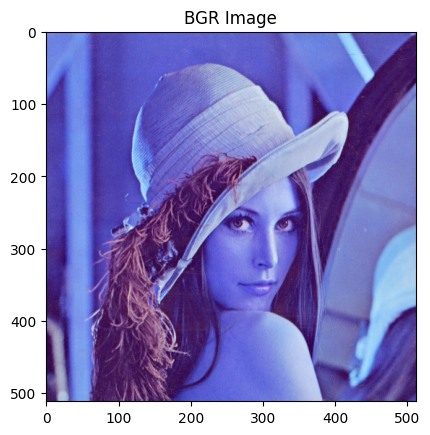

In [6]:
plt.imshow(img)
plt.title("BGR Image")
plt.show()

In [7]:
im1=cv.cvtColor(img,cv.COLOR_BGR2RGB)

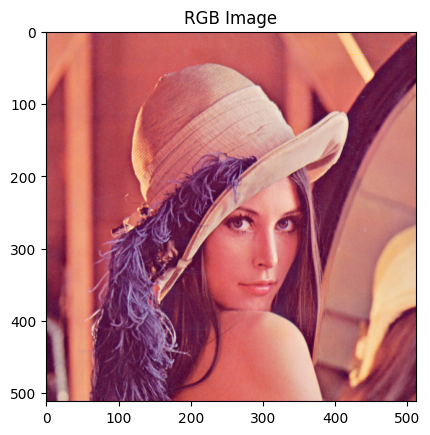

In [8]:
plt.imshow(im1)
plt.title("RGB Image")
plt.show()

In [9]:
imvector=list(im.ravel())
gs=[x for x in range(256)]

In [10]:
fre=[]
for x in gs:
    fre.append(imvector.count(x))

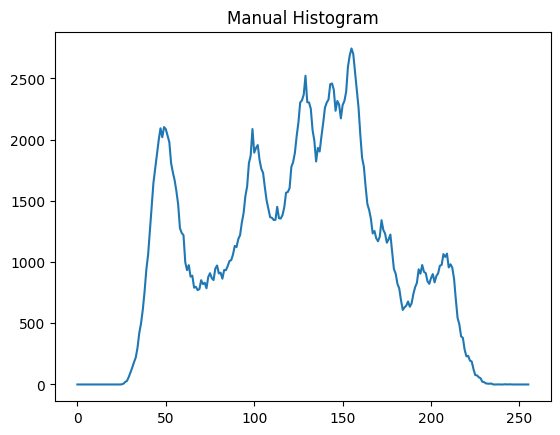

In [11]:
plt.plot(gs,fre)
plt.title("Manual Histogram")
plt.show()

In [12]:
hist=cv.calcHist([im],[0],None,[256],[0,256])


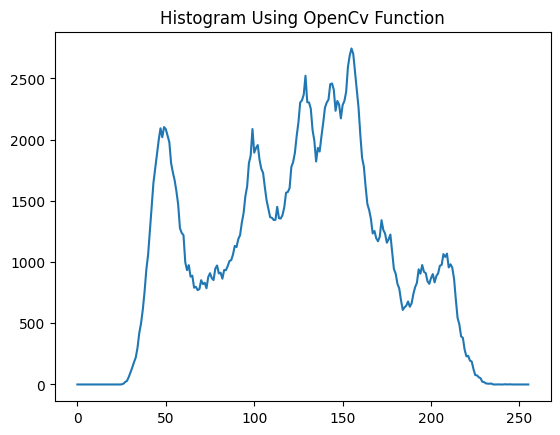

In [13]:
plt.title("Histogram Using OpenCv Function")
plt.plot(hist)
plt.show()

In [14]:
fre1=[]
for i in range(256):
    fre1.append(fre[i]/(512*512))
    

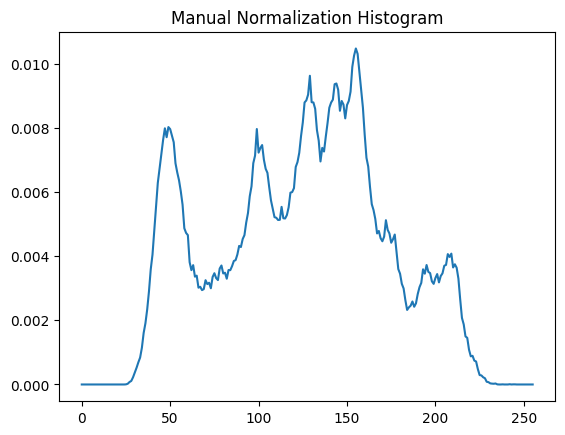

In [15]:
plt.plot(gs,fre1)
plt.title("Manual Normalization Histogram")
plt.show()

#ENtROPY CALCULATION

In [16]:
import cv2
import os
import numpy as np

In [17]:
def calculate_entropy(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_normalized = hist / np.sum(hist)
    entropy = -np.sum(hist_normalized * np.log2(hist_normalized + 1e-10))
    return entropy

In [24]:
image_directory='Image'
image_list=[]

In [25]:
for filename in os.listdir(image_directory):
    if filename.endswith(('.jpg', '.png', '.jpeg', '.tiff')):
        image_path = os.path.join(image_directory, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        entropy_value = calculate_entropy(img)
        image_list.append((filename, entropy_value))

In [26]:
sorted_image_list = sorted(image_list, key=lambda x: x[1])

In [27]:
for filename, entropy in sorted_image_list:
    print(f'Image: {filename}, Entropy: {entropy}')

Image: newim.png, Entropy: 3.4924967288970947
Image: salt.png, Entropy: 6.890413284301758
Image: splash.tiff, Entropy: 7.2534027099609375
Image: baboon.tiff, Entropy: 7.358314514160156
Image: car1.png, Entropy: 7.4776105880737305
Image: 71.tiff, Entropy: 7.4819722175598145
Image: elaine.tiff, Entropy: 7.505983352661133
Image: peeper.tiff, Entropy: 7.593601226806641


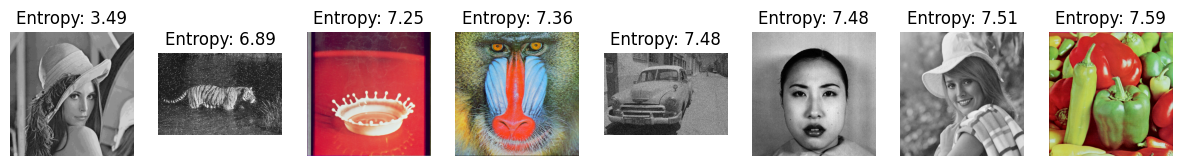

In [28]:
fig, axes = plt.subplots(1, len(sorted_image_list), figsize=(15, 5))

for i, (filename, entropy) in enumerate(sorted_image_list):
    image_path = os.path.join(image_directory, filename)
    img = cv2.imread(image_path)
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Entropy: {entropy:.2f}')

plt.show()


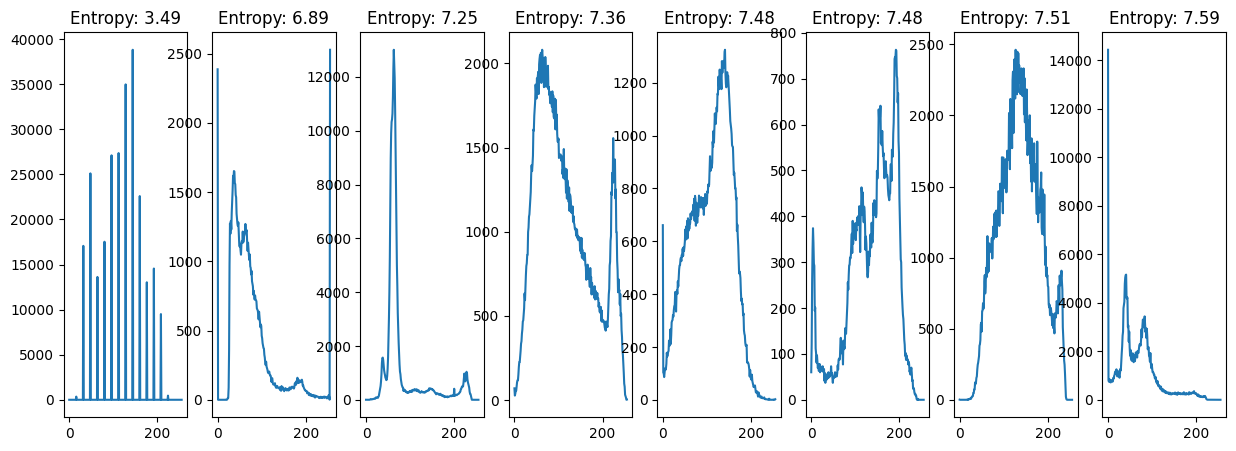

In [29]:
fig, axes = plt.subplots(1, len(sorted_image_list), figsize=(15, 5))

for i, (filename, entropy) in enumerate(sorted_image_list):
    image_path = os.path.join(image_directory, filename)
    img = cv2.imread(image_path)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    axes[i].plot(hist)
    axes[i].axis()
    axes[i].set_title(f'Entropy: {entropy:.2f}')

plt.show()